In [1]:
people = [
    {"name": "Ali", "age": 28, "salary": 50000},
    {"name": "Sara", "age": 35, "salary": 75000},
    {"name": "Reza", "age": 42, "salary": 82000},
    {"name": "Mina", "age": 31, "salary": 68000},
    {"name": "Amir", "age": 29, "salary": 54000},
    {"name": "Neda", "age": 38, "salary": 91000},
    {"name": "Hossein", "age": 45, "salary": 87000},
    {"name": "Leila", "age": 33, "salary": 72000}
]

filtered_people = [p for p in people if p["age"] > 30]

average_salary = sum(p["salary"] for p in filtered_people) / len(filtered_people)

max_salary_person = max(filtered_people, key=lambda p: p["salary"])

print("Average salary (age > 30):", average_salary)
print("Highest salary person:", max_salary_person["name"])


Average salary (age > 30): 79166.66666666667
Highest salary person: Neda


In [2]:
import numpy as np


data = np.random.randint(0, 101, size=100)

mean_val = np.mean(data)
median_val = np.median(data)
std_val = np.std(data)

outliers = data[data > (mean_val + std_val)]
percentage = (len(outliers) / len(data)) * 100


print("Mean:", mean_val)
print("Median:", median_val)
print("Standard Deviation:", std_val)
print("Outliers ( > mean + std):", outliers)
print("Outlier Percentage:", percentage, "%")


Mean: 50.34
Median: 50.0
Standard Deviation: 26.906958207868836
Outliers ( > mean + std): [ 79  92  94  89  89  91  93  86  81 100  84  88  80  99  82  87  79  80
  94  97]
Outlier Percentage: 20.0 %


In [3]:
import pandas as pd
import numpy as np


df = pd.DataFrame({
    "age": [22, 35, 41, 29, 50, 33, 27, 45, 38, 31],
    "income": [40000, 80000, 120000, 50000, 90000, 75000, 30000, 110000, 68000, 85000],
    "visits": [2, 8, 12, 0, 6, 7, 1, 10, 5, 9]
})

df["income_per_visit"] = np.where(df["visits"] == 0, 0, df["income"] / df["visits"])


df["potential_customer"] = np.where(
    (df["visits"] > 5) & (df["income"] > 70000),
    1,
    0
)


print(df[df["potential_customer"] == 1])


   age  income  visits  income_per_visit  potential_customer
1   35   80000       8      10000.000000                   1
2   41  120000      12      10000.000000                   1
4   50   90000       6      15000.000000                   1
5   33   75000       7      10714.285714                   1
7   45  110000      10      11000.000000                   1
9   31   85000       9       9444.444444                   1


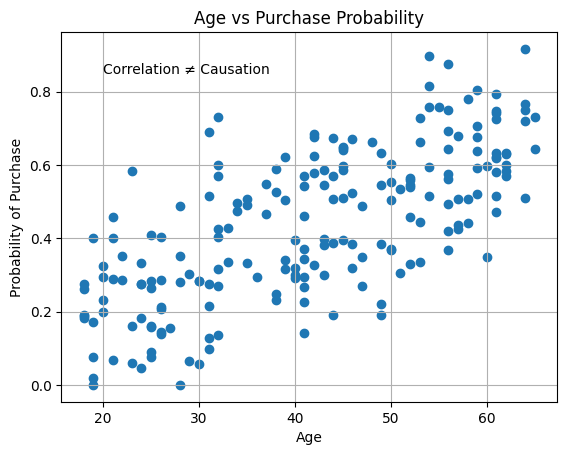

In [4]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
age = np.random.randint(18, 66, size=200)

prob_buy = 0.01 * age + np.random.normal(0, 0.15, size=200)
prob_buy = np.clip(prob_buy, 0, 1)

plt.figure()
plt.scatter(age, prob_buy)
plt.xlabel("Age")
plt.ylabel("Probability of Purchase")
plt.title("Age vs Purchase Probability")
plt.grid(True)


plt.text(20, 0.85, "Correlation ≠ Causation", fontsize=10)

plt.show()


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


np.random.seed(42)
n = 800

age = np.random.randint(18, 66, size=n)
income = np.random.randint(30000, 150001, size=n)


income_scaled = (income - 90000) / 30000
age_scaled = (age - 40) / 10

r2 = age_scaled**2 + income_scaled**2
y = ((r2 > 0.7) & (r2 < 2.2)).astype(int)

X = np.column_stack([age, income])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


model = SVC(kernel="rbf", gamma="scale", C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


new_sample = np.array([[32, 95000]])
print("New input:", new_sample[0], "-> Predicted class:", int(model.predict(new_sample)[0]))


Accuracy: 0.7875
New input: [   32 95000] -> Predicted class: 0
